<img src="https://datascientest.fr/train/assets/logo_datascientest.png" style="height:150px"> 
<hr style="border-width:2px;border-color:##75DFC1">
<center> <h1> Projet COVID </h1> </center> <br>
<center> <h2> Dataset Visualization</h2> </center> <br>
<hr style="border-width:2px;border-color:##75DFC1">

Visualisation des images et prétraitement

Essayons de comprendre pourquoi nous avons eu de si bons scores avec un CNN simple
<hr style="border-width:2px;border-color:##75DFC1">

>t-SNE

>Sélection d'un ensemble test

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import cv2

os.chdir('COVID-19 Radiography Database')

df = pd.read_csv('img_metadata.csv')

Pour observer les images et les traiter plus facilement, nous allons toutes les mettre au format 28*28

In [2]:
columns = ['pixel'+str(ii) for ii in range(28*28)]
pixels = pd.DataFrame(columns = columns)

for i, path in df.path.items():
    im = cv2.imread(path, 0)
    im_resized = cv2.resize(im, (28, 28))
    pixels.loc[path] = im_resized.reshape((28*28))

pixels.head(20)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
COVID/COVID (934).png,37,70,88,79,77,77,77,87,86,107,...,116,116,114,114,114,128,144,130,63,44
COVID/COVID (296).png,0,0,0,0,0,0,0,0,0,0,...,169,163,163,158,147,152,155,151,157,137
COVID/COVID (74).png,95,98,105,111,126,147,131,106,113,118,...,210,213,213,217,221,223,227,228,235,250
COVID/COVID (261).png,10,25,56,107,92,150,181,200,208,219,...,245,245,245,244,244,244,243,243,238,219
COVID/COVID (978).png,164,150,137,158,148,140,121,154,140,130,...,156,175,191,190,181,174,183,178,174,160
COVID/COVID (285).png,101,102,93,92,88,86,87,98,118,134,...,178,177,176,174,173,174,165,157,155,138
COVID/COVID (195).png,95,97,105,105,126,145,134,104,113,117,...,210,212,212,216,221,222,227,228,235,248
COVID/COVID (1092).png,97,36,15,118,87,113,37,41,51,82,...,247,244,238,228,228,211,198,183,165,84
COVID/COVID (869).png,17,19,39,22,39,6,11,10,97,76,...,197,202,210,210,196,196,208,189,109,1
COVID/COVID (1052).png,7,2,1,1,0,1,3,1,2,59,...,221,218,217,219,218,213,207,214,189,159


In [3]:
labels = df[['path', 'Class']].set_index('path')['Class'].replace({'covid' : 1, 'normal' : 0, 'pneumo' : 2})
pixels['label'] = labels
pixels.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label
COVID/COVID (934).png,37,70,88,79,77,77,77,87,86,107,...,116,114,114,114,128,144,130,63,44,1
COVID/COVID (296).png,0,0,0,0,0,0,0,0,0,0,...,163,163,158,147,152,155,151,157,137,1
COVID/COVID (74).png,95,98,105,111,126,147,131,106,113,118,...,213,213,217,221,223,227,228,235,250,1
COVID/COVID (261).png,10,25,56,107,92,150,181,200,208,219,...,245,245,244,244,244,243,243,238,219,1
COVID/COVID (978).png,164,150,137,158,148,140,121,154,140,130,...,175,191,190,181,174,183,178,174,160,1


In [16]:
pixels.to_csv('pixels_28_28.csv')

In [3]:
pixels = pd.read_csv('pixels_28_28.csv', index_col = 0)
pixels.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label
COVID/COVID (934).png,37,70,88,79,77,77,77,87,86,107,...,116,114,114,114,128,144,130,63,44,1
COVID/COVID (296).png,0,0,0,0,0,0,0,0,0,0,...,163,163,158,147,152,155,151,157,137,1
COVID/COVID (74).png,95,98,105,111,126,147,131,106,113,118,...,213,213,217,221,223,227,228,235,250,1
COVID/COVID (261).png,10,25,56,107,92,150,181,200,208,219,...,245,245,244,244,244,243,243,238,219,1
COVID/COVID (978).png,164,150,137,158,148,140,121,154,140,130,...,175,191,190,181,174,183,178,174,160,1


In [4]:
target = pixels['label']
data = pixels.drop('label',1)
data.columns

Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=784)

On voudrait visualiser les images sur un plan 2D, pour voir si on peut distinguer un pattern

Pour cela, on va effectuer un clustering sur les pixels avec un tSNE de 2 composantes

In [5]:
from matplotlib import offsetbox

def plot_components(data, model, images=None, ax=None,
                    thumb_frac=0.05, cmap='gray_r', prefit = False, scatter = True):
    ax = ax or plt.gca()
    
    if not prefit :
        proj = model.fit_transform(data)
    else:
        proj = data
        
    if scatter == True :
        ax.plot(proj[:, 0], proj[:, 1], '.b')
    
    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                # On ne montre pas le points trop proches
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(images[i], cmap=cmap),
                                      proj[i])
            ax.add_artist(imagebox)

In [9]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, method = 'barnes_hut')
dataTSNE = tsne.fit_transform(data)


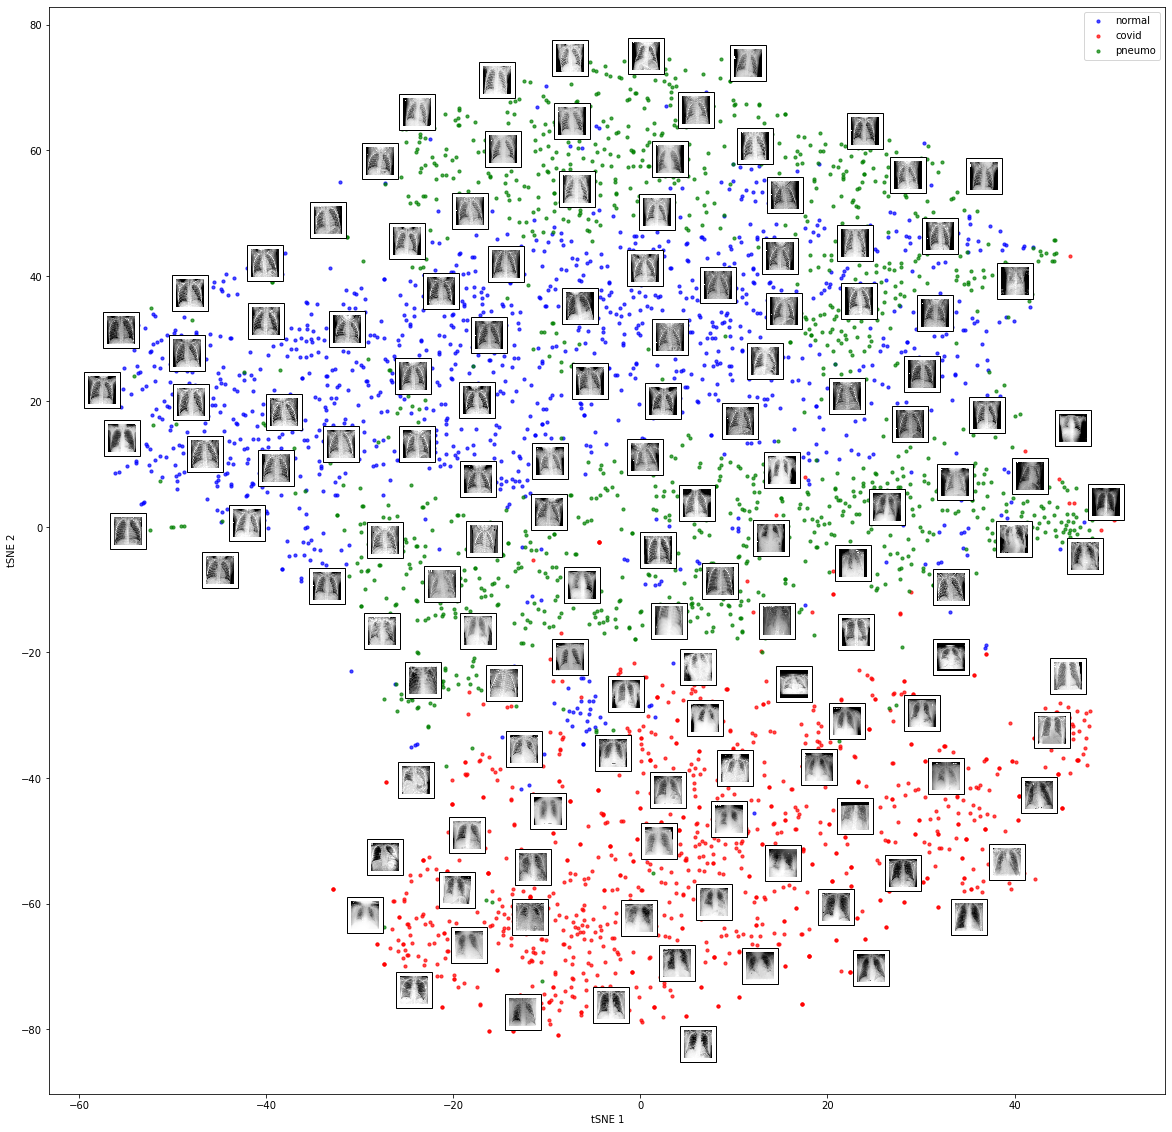

In [10]:
ldict = {1 : 'covid', 0 : 'normal', 2 : 'pneumo'}
cdict = {1: 'red', 0: 'blue', 2: 'green'}
fig, ax = plt.subplots(figsize=(20,20))
for g in np.unique(target):
    ix = np.where(target == g)
    ax.scatter(dataTSNE[ix, 0], dataTSNE[ix, 1], c = cdict[g], label = ldict[g], 
           alpha = .7, s = 10)

plot_components(dataTSNE, tsne, images=data.values.reshape((-1, 28, 28)).astype(int),
                ax=ax, thumb_frac=0.05, cmap='gray', prefit=True, scatter = False)
ax.set_ylabel('tSNE 2')
ax.set_xlabel('tSNE 1')
ax.legend();

On observe sur cette projection qu'avec 2 composantes, on peut déjà séparer les 3 classes de manière assez juste.
Cette observation est très importante : rien qu'avec des vecteurs de petite taille (28*28) et sans supervision, on réussit à classifier presque correctement les pathologies ! On peut supposer qu'une information globale est présente dans les images (peut-être à cause de la provenance des images) qui permet de séparer le jeu de données : luminosité, contraste... ? C'est surement pour cette raison que le CNN marche si bien (97% de val_accuracy).

In [11]:
from sklearn import ensemble
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, random_state = 3)

In [12]:
clf = ensemble.RandomForestClassifier(n_jobs = -1, random_state = 321)
clf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=321)

In [13]:
y_pred = clf.predict(X_test)
pd.crosstab(y_test, y_pred, 
            rownames=['Classe réelle'], colnames=['Classe prédite']).rename(
    columns={1 : 'covid', 0 : 'normal', 2 : 'pneumo'}, 
    index={1 : 'covid', 0 : 'normal', 2 : 'pneumo'})

Classe prédite,normal,covid,pneumo
Classe réelle,,,
normal,244,5,20
covid,1,227,2
pneumo,24,6,249


In [14]:
clf.score(X_test, y_test)

0.9254498714652957

Pour se donner une idée, un random forest sur les 2 composantes t-SNE donne déjà un score de 92% (seulement grâce aux deux composantes issues des images 28*28 !

Sur la projection t-SNE, on observe que les covids se distinguent très facilement des 2 autres classes grâce à une droite. Les pneumos sont plus difficiles à distinguer des normaux mais un cercle autours des normaux semble fonctionner correctement. 

L'idée est donc de sélectionner dans un ensemble test, les images qui se distinguent difficilement sur cette projection. Cette ensemble test permettra de donner un score de validation sur les prochains algo que nous allons tester. Pour cela nous allons effectuer une SVC sur les composantes de la t-SNE, sans train_test_split

In [17]:
from sklearn.svm import SVC
from sklearn.preprocessing import scale

In [18]:
data_scaled = scale(data)
clf = SVC()
clf.fit(dataTSNE, target)

SVC()

In [19]:
y_pred = clf.predict(dataTSNE)
pd.crosstab(target, y_pred, 
            rownames=['Classe réelle'], colnames=['Classe prédite']).rename(
    columns={1 : 'covid', 0 : 'normal', 2 : 'pneumo'}, 
    index={1 : 'covid', 0 : 'normal', 2 : 'pneumo'})

Classe prédite,normal,covid,pneumo
Classe réelle,,,
normal,1040,42,259
covid,4,1121,75
pneumo,218,19,1108


On peut donc sélectionner par exemple les 4+75 covids qui sont mal classés par la SVC, et les inclure dans l'ensemble test

Visualisons maintenant le résultat de la SVC

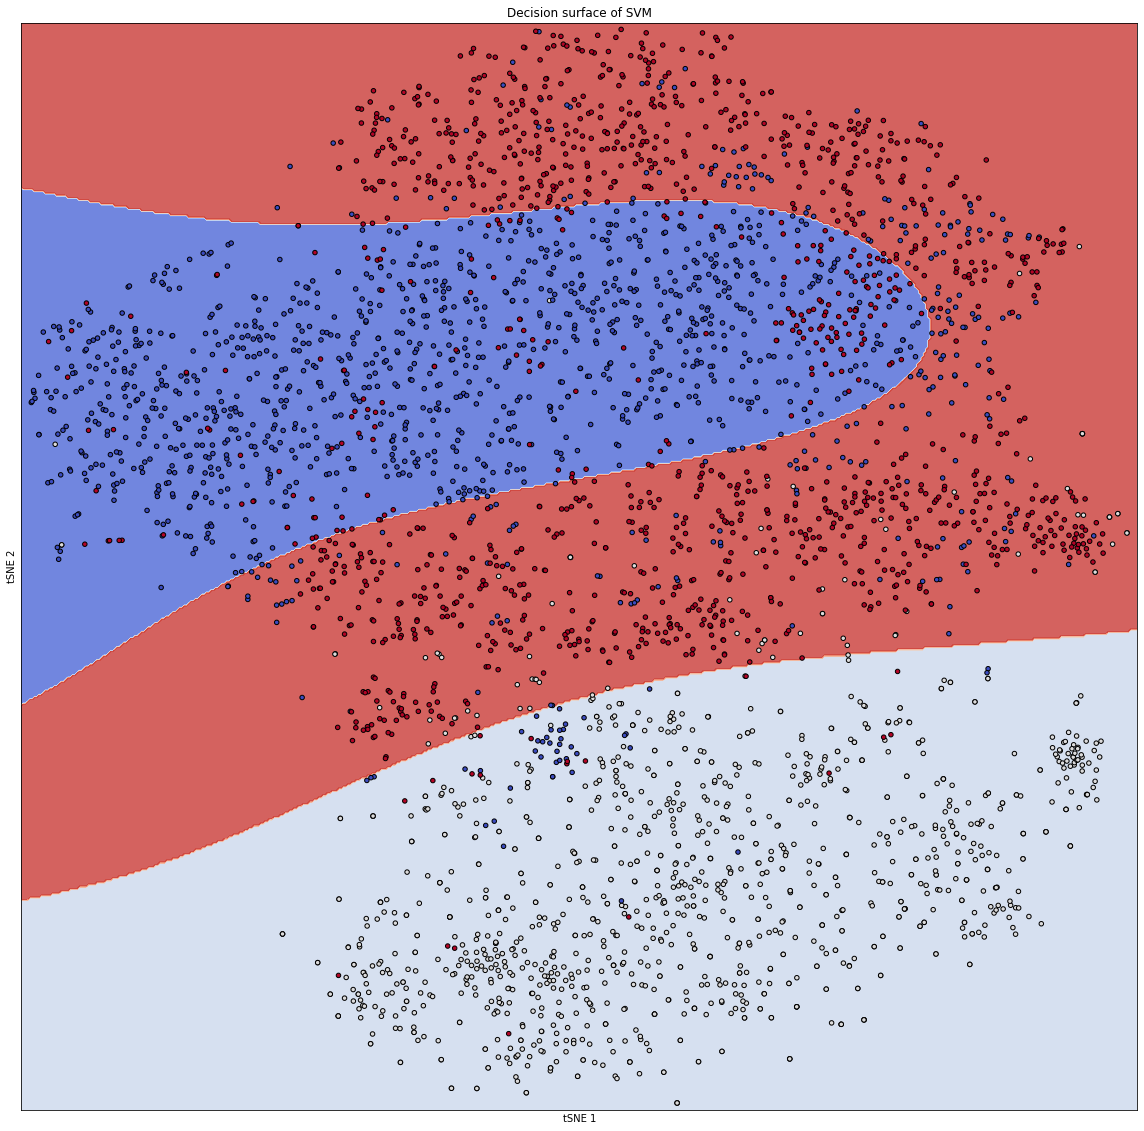

In [20]:
def make_meshgrid(x, y, n=500):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, n), np.linspace(y_min, y_max, n))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots(figsize=(20, 20))
# title for the plots
title = ('Decision surface of SVM')
# Set-up grid for plotting.
X0, X1 = dataTSNE[:, 0], dataTSNE[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=target, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('tSNE 2')
ax.set_xlabel('tSNE 1')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

On voit qu'un modèle "naïf" permet de classifier correctement le dataset. Voyons maintenant si un préprocessing des images (luminosité, contraste...) permet de corriger ce biais.

In [22]:
y_pred

array([1, 1, 1, ..., 2, 2, 1])

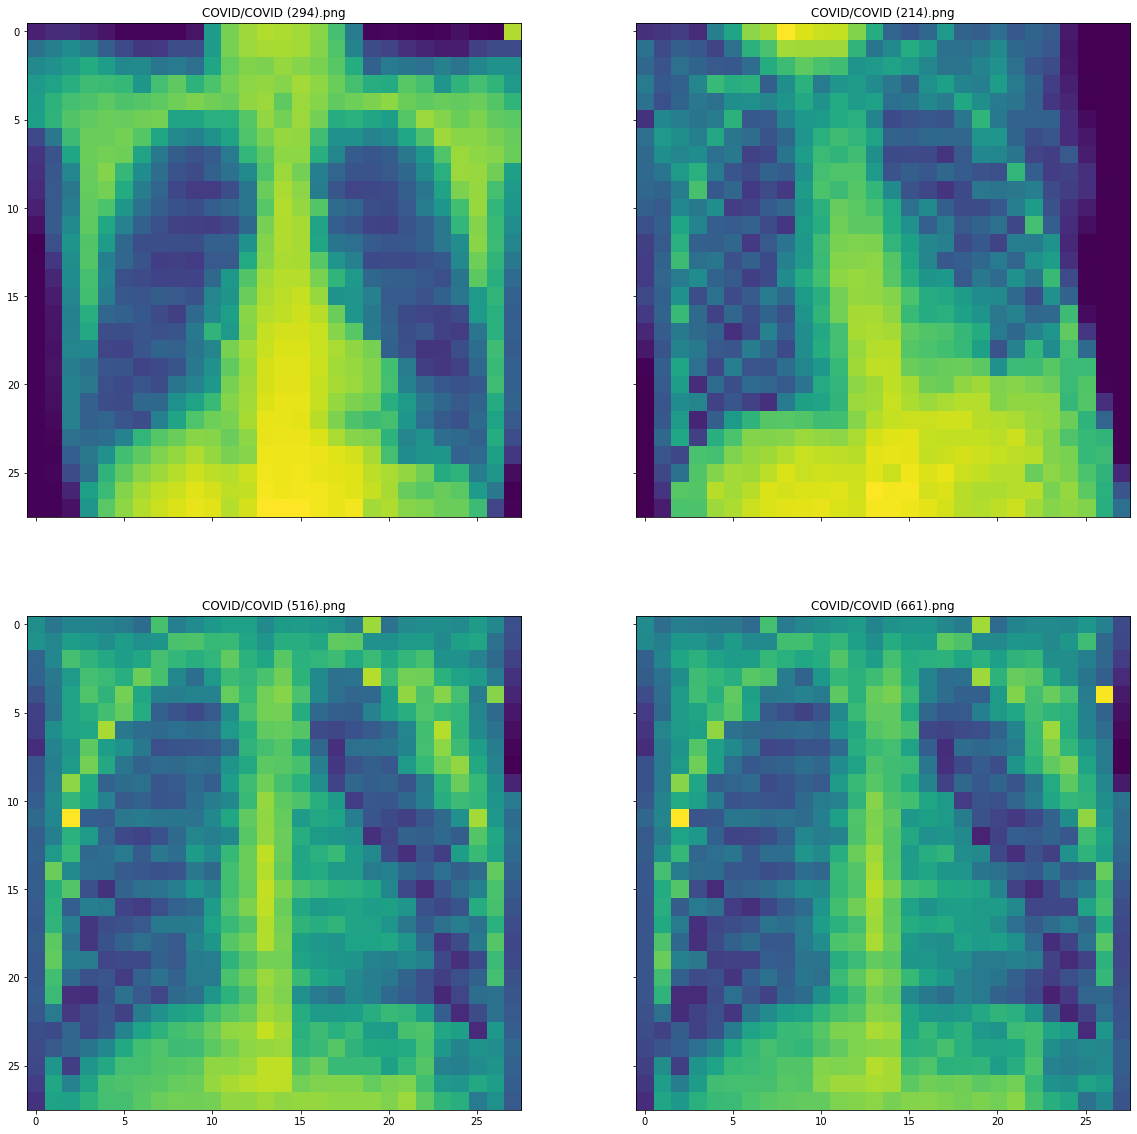

In [43]:
# les 4 covids classés en normal sont :
results = pd.DataFrame(target)
results['pred'] = y_pred

test_covid = data.loc[results[(results['label'] == 1) & (results['pred'] == 0)].index] # reel covid, pred normal

fig, axes = plt.subplots(2, 2, figsize=(20, 20), sharex = True, sharey = True)

axes = axes.ravel()

for ii in range(4):
    axes[ii].imshow(test_covid.iloc[ii].values.astype(int).reshape((28, 28)))
    axes[ii].set_title(test_covid.index[ii])

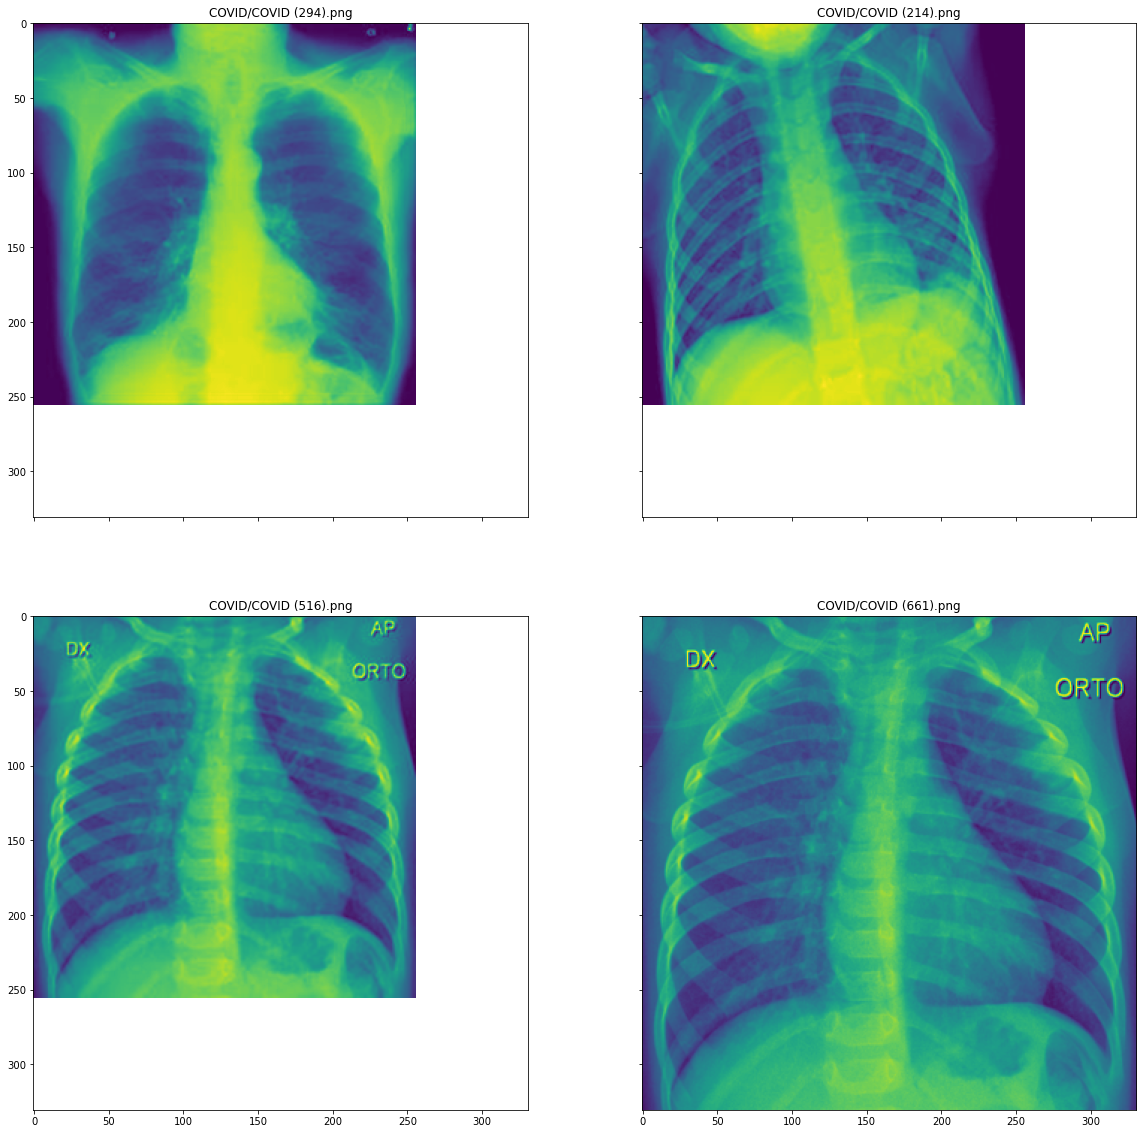

In [45]:
fig, axes = plt.subplots(2, 2, figsize=(20, 20), sharex = True, sharey = True)

axes = axes.ravel()

for ii in range(4):
    image_name = test_covid.index[ii]
    scan = plt.imread(image_name)
    axes[ii].imshow(scan);    
    axes[ii].set_title(image_name)

In [26]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
dataPCA = pca.fit_transform(data)

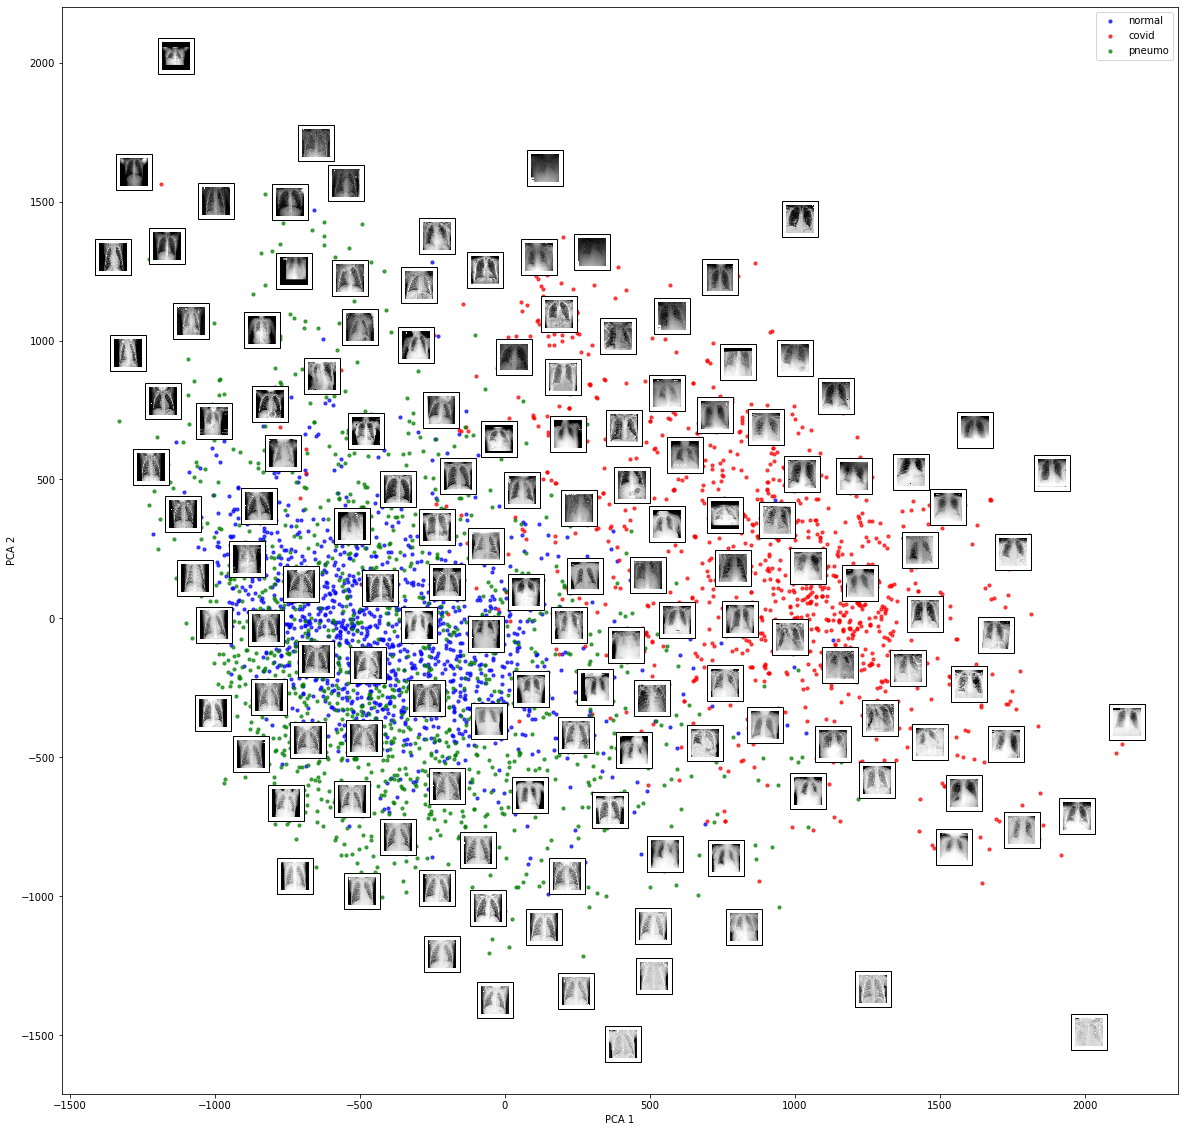

In [27]:
ldict = {1 : 'covid', 0 : 'normal', 2 : 'pneumo'}
cdict = {1: 'red', 0: 'blue', 2: 'green'}
fig, ax = plt.subplots(figsize=(20,20))
for g in np.unique(target):
    ix = np.where(target == g)
    ax.scatter(dataPCA[ix, 0], dataPCA[ix, 1], c = cdict[g], label = ldict[g], 
           alpha = .7, s = 10)

plot_components(dataPCA, pca, images=data.values.reshape((-1, 28, 28)).astype(int),
                ax=ax, thumb_frac=0.05, cmap='gray', prefit=True, scatter = False)
ax.set_ylabel('PCA 2')
ax.set_xlabel('PCA 1')
ax.legend();

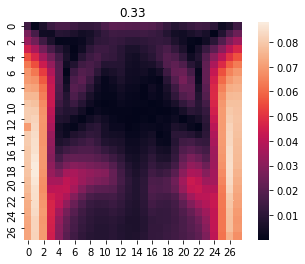

In [28]:
import seaborn as sns
sns.heatmap(abs(pca.components_[0].reshape((28,28))), square = True)
plt.title(round(pca.explained_variance_ratio_[0], 2));

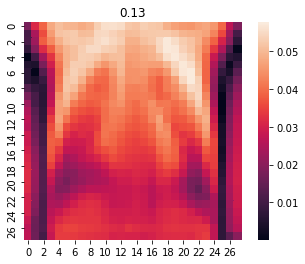

In [29]:
sns.heatmap(abs(pca.components_[1].reshape((28,28))), square = True)
plt.title(round(pca.explained_variance_ratio_[1], 2));

In [16]:
from sklearn.preprocessing import scale
data_scaled = scale(data)
pca = PCA(n_components=2)
dataPCA = pca.fit_transform(data_scaled)

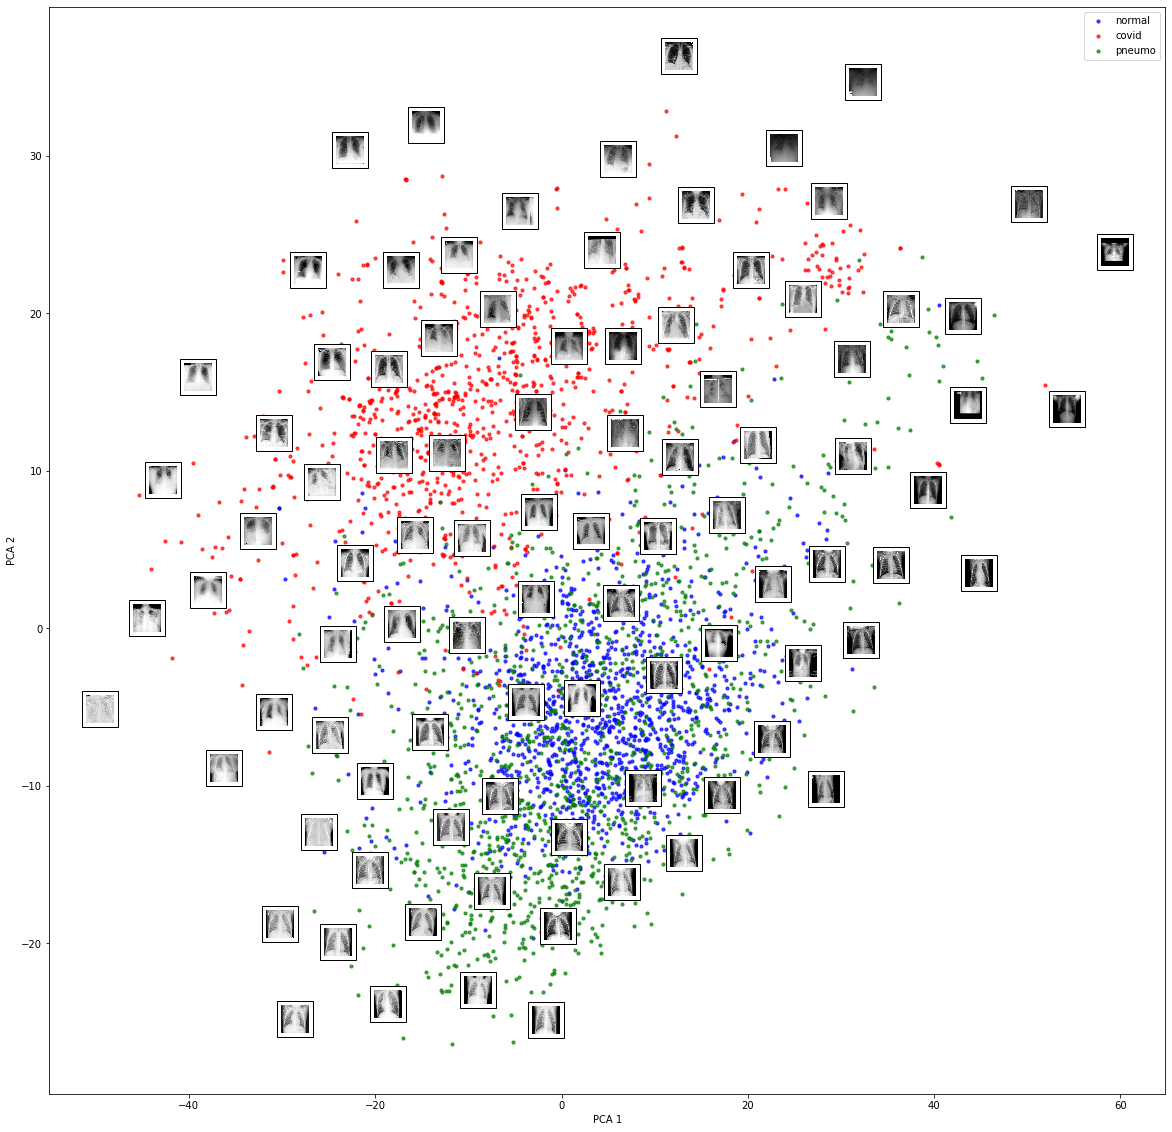

In [17]:
ldict = {1 : 'covid', 0 : 'normal', 2 : 'pneumo'}
cdict = {1: 'red', 0: 'blue', 2: 'green'}
fig, ax = plt.subplots(figsize=(20,20))
for g in np.unique(target):
    ix = np.where(target == g)
    ax.scatter(dataPCA[ix, 0], dataPCA[ix, 1], c = cdict[g], label = ldict[g], 
           alpha = .7, s = 10)

plot_components(dataPCA, pca, images=data.values.reshape((-1, 28, 28)).astype(int),
                ax=ax, thumb_frac=0.05, cmap='gray', prefit=True, scatter = False)
ax.set_ylabel('PCA 2')
ax.set_xlabel('PCA 1')
ax.legend();

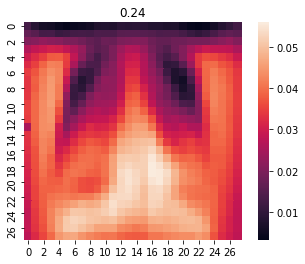

In [24]:
sns.heatmap(abs(pca.components_[0].reshape((28,28))), square = True)
plt.title(round(pca.explained_variance_ratio_[0], 2));

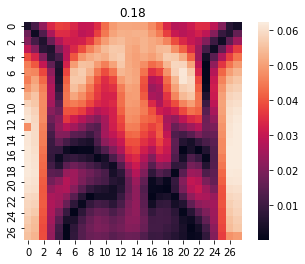

In [25]:
sns.heatmap(abs(pca.components_[1].reshape((28,28))), square = True)
plt.title(round(pca.explained_variance_ratio_[1], 2));